In [1]:
from scipy.stats import qmc
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc, truncexpon, norm
import seaborn as sns
import pandas as pd

%matplotlib inline

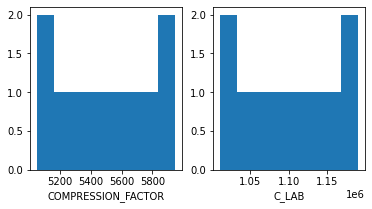

In [2]:
n = 10
names =    ['COMPRESSION_FACTOR', 'C_LAB']
l_bounds = [                 5e3,   1.0e6]
u_bounds = [                 6e3,   1.2e6]

sampler = qmc.LatinHypercube(d=len(l_bounds), centered=True)
sample = sampler.random(n=n)
sample = qmc.scale(sample, l_bounds, u_bounds)

fig, axs = plt.subplots(1, len(names), figsize=(len(names)*3, 3))
for i, name in enumerate(names):
    axs[i].hist(sample[:, i], 8)
    axs[i].set_xlabel(name)
plt.show()



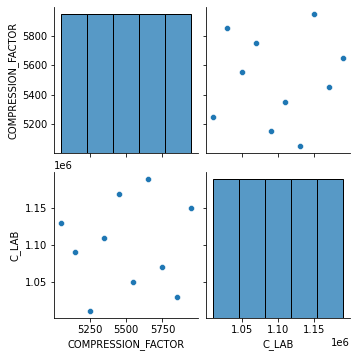

In [3]:
sample_df = pd.DataFrame(sample, columns=names)
sns.pairplot(sample_df, diag_kind='hist')

In [4]:
exp_config_template = 'sa10free_template.cfg'

def create_config(conf_file_name, params):
    with open(exp_config_template) as f:
        template_lines = f.readlines()

    print(conf_file_name)
    cfg_lines = []
    for cfg_line in template_lines:
        for name, value in params.items():
            cfg_line_split = cfg_line.strip().split('=')
            if name in cfg_line_split:
                cfg_line = cfg_line.replace(name, str(value))
        cfg_lines.append(cfg_line)

    with open(conf_file_name, 'wt') as f:
        f.writelines(cfg_lines)


In [5]:
forecast_dir = '/cluster/work/users/akorosov/music'
for iexp, rec in sample_df.iterrows():
    exp_basename = f'sa10free_mat{iexp:02}'
    conf_file_name = f'{exp_basename}.cfg'
    params = dict(
        COMPRESSION_FACTOR          = int(np.round(rec.COMPRESSION_FACTOR, 0)),
        C_LAB                       = int(np.round(rec.C_LAB, 0)),
        EXPORTER_PATH               = f'{forecast_dir}/{exp_basename}',
    )
    print(conf_file_name, params)
    create_config(conf_file_name, params)


sa10free_mat00.cfg {'COMPRESSION_FACTOR': 5250, 'C_LAB': 1010000, 'EXPORTER_PATH': '/cluster/work/users/akorosov/music/sa10free_mat00'}
sa10free_mat00.cfg
sa10free_mat01.cfg {'COMPRESSION_FACTOR': 5550, 'C_LAB': 1050000, 'EXPORTER_PATH': '/cluster/work/users/akorosov/music/sa10free_mat01'}
sa10free_mat01.cfg
sa10free_mat02.cfg {'COMPRESSION_FACTOR': 5850, 'C_LAB': 1030000, 'EXPORTER_PATH': '/cluster/work/users/akorosov/music/sa10free_mat02'}
sa10free_mat02.cfg
sa10free_mat03.cfg {'COMPRESSION_FACTOR': 5150, 'C_LAB': 1090000, 'EXPORTER_PATH': '/cluster/work/users/akorosov/music/sa10free_mat03'}
sa10free_mat03.cfg
sa10free_mat04.cfg {'COMPRESSION_FACTOR': 5750, 'C_LAB': 1070000, 'EXPORTER_PATH': '/cluster/work/users/akorosov/music/sa10free_mat04'}
sa10free_mat04.cfg
sa10free_mat05.cfg {'COMPRESSION_FACTOR': 5350, 'C_LAB': 1110000, 'EXPORTER_PATH': '/cluster/work/users/akorosov/music/sa10free_mat05'}
sa10free_mat05.cfg
sa10free_mat06.cfg {'COMPRESSION_FACTOR': 5650, 'C_LAB': 1190000, 'EXP

In [6]:
!cat sa10free_mat00.cfg

[mesh]
filename=small_arctic_10km.msh

[simul]
duration=181
time_init=2006-11-15
timestep=900

[dynamics]
compression_factor=5250
C_lab=1010000

substeps=90
time_relaxation_damage=15
use_temperature_dependent_healing=true

[output]
exporter_path=/cluster/work/users/akorosov/music/sa10free_mat00
output_per_day=4
variables=M_VT
variables=Concentration
variables=Thickness

[setup]
atmosphere-type=era5
ice-type=topaz_osisaf_icesat
ocean-type=topaz
bathymetry-type=etopo
dynamics-type=bbm

[thermo]
diffusivity_sss=0
diffusivity_sst=0
h_young_max=0.3
newice_type=1
hnull=0.5

[debugging]
check_fields_fast=false


In [7]:
import time
from subprocess import call
for i in range(50):
    cmd = f'sbatch --qos=short /cluster/home/akorosov/n/nextsim-env/config_files/music/run_music.sh sa10free_mat{i:02}'
    print(cmd)
    time.sleep(1)
    call(cmd, shell=True)
    break

sbatch --qos=short /cluster/home/akorosov/n/nextsim-env/config_files/music/run_music.sh sa10free_mat00


/bin/sh: 1: sbatch: not found
